# 라이브러리

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

# 1. 데이터 로드

In [9]:
df = pd.read_excel('../데이터/최종본.xlsx')
df.head()

,year,month,day,ws,ta,hm,rn,result
0,2019,1,1,3.0,4.1,36,0.0,0
1,2019,1,2,3.9,4.2,30,0.0,1
2,2019,1,3,5.1,5.3,20,0.0,1
3,2019,1,4,5.8,6.3,20,0.0,0
4,2019,1,5,4.4,7.0,40,0.0,1


In [10]:
result_counts = df['result'].value_counts(normalize=True) * 100  # 비율(%)
print("result 0과 1의 비율:")
print(result_counts)

result 0과 1의 비율:
result
0    75.945205
1    24.054795
Name: proportion, dtype: float64


# 2. 특징과 레이블 선택

In [11]:
X = df[['year', 'month', 'day', 'ws', 'ta', 'hm', 'rn']]  # 특징
y = df['result']  # 레이블

# 3. 데이터 분할
(훈련/검증 세트, 비율: 90:10)   

In [12]:
# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

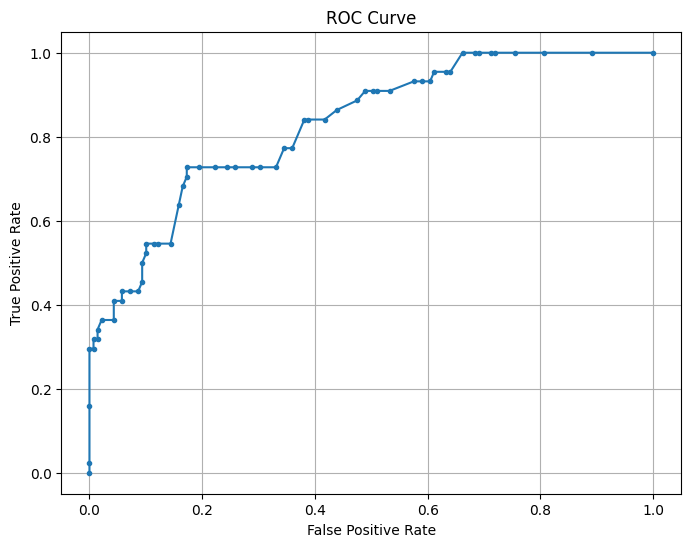

Optimal Threshold: 0.36


In [14]:
import matplotlib.pyplot as plt

# 예측 확률
y_scores = model.predict_proba(X_test)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

# 최적의 threshold 찾기 (TPR와 FPR의 차이가 가장 큰 지점)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# 5. 예측 및 평가

In [15]:
# 최적의 threshold를 사용하여 예측
y_val_pred = (y_scores >= optimal_threshold).astype(int)

# 모델 평가
print("검증 세트 정확도:", accuracy_score(y_test, y_val_pred))
print("검증 세트 ROC AUC 점수:", roc_auc_score(y_test, y_scores))
print("검증 세트 보고서:\n", classification_report(y_test, y_val_pred))

검증 세트 정확도: 0.8032786885245902
검증 세트 ROC AUC 점수: 0.8284826684107259
검증 세트 보고서:
               precision    recall  f1-score   support

           0       0.91      0.83      0.86       139
           1       0.57      0.73      0.64        44

    accuracy                           0.80       183
   macro avg       0.74      0.78      0.75       183
weighted avg       0.83      0.80      0.81       183



In [16]:
test_pred = model.predict(X_test)

# 모델 평가
print("검증 세트 정확도:", accuracy_score(y_test, test_pred))
print("검증 세트 ROC AUC 점수:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("검증 세트 보고서:\n", classification_report(y_test, test_pred))

검증 세트 정확도: 0.8142076502732241
검증 세트 ROC AUC 점수: 0.8284826684107259
검증 세트 보고서:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       139
           1       0.68      0.43      0.53        44

    accuracy                           0.81       183
   macro avg       0.76      0.68      0.71       183
weighted avg       0.80      0.81      0.80       183



In [17]:
test_pred_proba = model.predict_proba(X_test)[:, 1]  # 양성 클래스에 대한 확률

# 7. 테스트 세트와 예측 결과 출력
test_results = pd.DataFrame({
    '정답': y_test,
    '예측': test_pred,
    '예측 확률': test_pred_proba,
    '날짜': pd.to_datetime(X_test[['year', 'month', 'day']]).dt.strftime('%Y-%m-%d'),
    '풍속 (ws)': X_test['ws'].values,
    '기온 (ta)': X_test['ta'].values,
    '습도 (hm)': X_test['hm'].values,
    '일일강수량 (rn)': X_test['rn'].values
})

In [20]:
print("\n테스트 세트 결과:")
test_results.sample(30)


테스트 세트 결과:


,정답,예측,예측 확률,날짜,풍속 (ws),기온 (ta),습도 (hm),일일강수량 (rn)
1420,0,1,0.64,2022-11-22,1.5,17.0,65,0.0
634,0,0,0.13,2020-09-26,3.1,24.7,53,0.0
1246,1,1,0.60,2022-06-01,4.1,24.7,38,0.0
1157,0,1,0.58,2022-03-04,5.5,12.1,50,0.0
1015,0,0,0.02,2021-10-13,4.5,22.3,72,0.0
1169,0,0,0.23,2022-03-16,3.4,17.1,52,0.0
252,0,0,0.00,2019-09-10,5.2,27.8,83,0.0
1494,0,0,0.49,2023-02-04,4.6,6.1,26,0.0
1272,0,0,0.00,2022-06-27,7.6,23.2,100,10.9
1359,0,0,0.21,2022-09-22,2.4,24.1,64,0.0


# 6. 피처 중요도

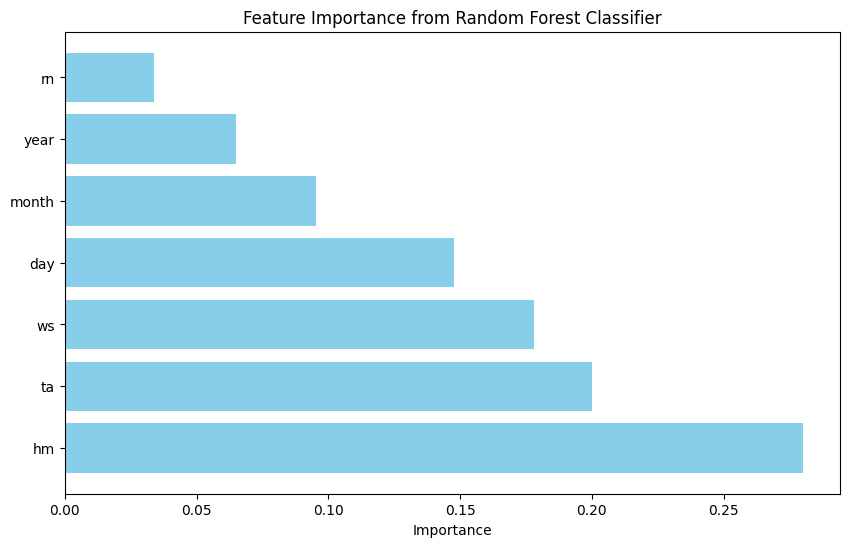

In [19]:
# 특성 중요도 가져오기
importances = model.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 중요도 기준으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()